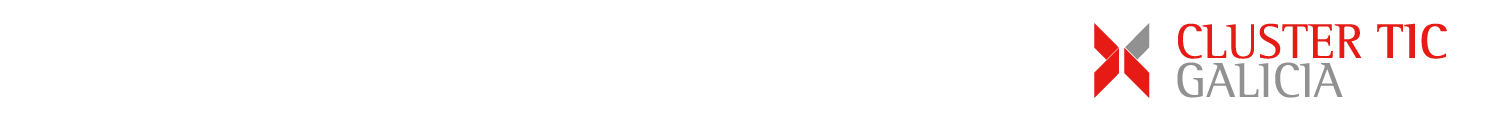
<a name = "inicio"></a>

<div style="font-size: 50px;text-align: center;height:120px;line-height: 60px;padding:10px;margin:10px 0 0 0;">Entrada, salida y generación de números aleatorios</div>

1. [Lectura y escritura de ficheros](#Lectura-y-escritura-de-ficheros)
1. [Números aleatorios](#Números-aleatorios)

In [1]:
import numpy as np

In [2]:
import warnings
warnings.filterwarnings(action = "ignore", category = FutureWarning)

# Lectura y escritura de ficheros

Numpy ofrece funciones, muy rápidas y eficientes, para leer y escribir arrays en disco: **numpy.save()**, **numpy.savez()** y **numpy.load()**. También es posible leer y escribir arrays en archivos con formato de texto con las funciones **numpy.savetxt()** y **numpy.loadtxt()**.

Veamos algunos ejemplos.

### numpy.save()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html

La función **numpy.save()** nos permite guardar el contenido de un array en disco. Con esta función los ficheros se graban con extensión "*.npy*". Si no indicamos esta extensión, se añadirá automáticamente (si indicamos otra extensión, la extensión *.npy* se añadirá tras la nuestra). Por ejemplo:

In [3]:
a = np.array([[1, 2, -2], [3, 4, 0], [3, 1, 1]])
a

array([[ 1,  2, -2],
       [ 3,  4,  0],
       [ 3,  1,  1]])

In [4]:
np.save("my_array", a)

### numpy.load()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html

Leamos ahora el array almacenado:

In [5]:
b = np.load("my_array.npy")
b

array([[ 1,  2, -2],
       [ 3,  4,  0],
       [ 3,  1,  1]])

Hemos guardado el fichero en disco con el nombre de "*my_array.npy*" y, a continuación, lo hemos cargado con la función **numpy.load()**, y hemos volcado su contenido en una nueva variable *b*.

### numpy.savez()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.savez.html

También es posible guardar varios arrays NumPy en el mismo archivo con la función **numpy.savez()**, en cuyo caso el fichero se guarda con la extensión "*.npz*" (la función de lectura sigue siendo la misma: **numpy.load()**). Al leer el fichero guardado, se devuelve un objeto con estructura de lista cuyos elementos contienen los arrays individuales. Se puede acceder a la lista de los índices de esta lista con el atributo **.files**.

Para probar esta función, creamos dos arrays NumPy:

In [6]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
b = np.arange(10, 0, -1)
b

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

Y los guardamos en un fichero con el nombre "*my_arrays.npz*" (esta extensión, si no la especificamos, se añade automáticamente, tal y como ocurría con la función *numpy.save()*)

In [8]:
np.savez("my_arrays", a, b)

A continuación, leemos el fichero y comprobamos la lista de índices accesible a través del atributo **.files**:

In [9]:
arrays = np.load("my_arrays.npz")
arrays.files

['arr_0', 'arr_1']

Por último, podemos comprobar que los arrays leídos son los correctos:

In [10]:
arrays['arr_0']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
arrays['arr_1']

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

# Las funciones loadtxt y savetxt

https://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html

https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html

También es posible guardar y leer arrays usando archivos con formato de texto con las funciones **numpy.savetxt()** y **numpy.loadtxt()**.

Para probarlas, creemos un array, guardémoslo y carguémoslo de nuevo:

In [12]:
a = np.arange(6).reshape((2, -1))
a

array([[0, 1, 2],
       [3, 4, 5]])

In [13]:
np.savetxt("my_array.txt", a)

In [14]:
b = np.loadtxt("my_array.txt")
b

array([[0., 1., 2.],
       [3., 4., 5.]])

En este caso, la función **numpy.savetxt()** permite especificar la extensión del fichero, por lo que resulta imprescindible indicarla (si no la añadimos, el fichero simplemente se guarda sin extensión).

Estas funciones también nos permiten guardar y leer ficheros en formato CSV:

In [15]:
np.savetxt("my_array.csv", a, delimiter = ",")

In [16]:
b = np.loadtxt("my_array.csv", delimiter = ",")
b

array([[0., 1., 2.],
       [3., 4., 5.]])

Eso sí, si almacenamos el array en un fichero de texto, se pierde la información del tipo. Por ejemplo, generemos un array de tipo *float32*:

In [17]:
a = np.arange(6, dtype = np.float32).reshape((2, -1))
a

array([[0., 1., 2.],
       [3., 4., 5.]], dtype=float32)

Guardémoslo y leámoslo de disco:

In [18]:
np.savetxt("my_array.txt", a)

In [19]:
b = np.loadtxt("my_array.txt")
b.dtype

dtype('float64')

Comprobamos que, efectivamente, se ha aplicado un tipo automático.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Números aleatorios

https://docs.scipy.org/doc/numpy/reference/random/index.html

La sublibrería **numpy.random** complementa la librería predefinida de Python **random** con funciones que permiten generar arrays NumPy de números aleatorios a partir de diversas distribuciones.

Esta sublibrería ofrece funciones para la generación de estos arrays, por ejemplo:

#### numpy.random.random()

Función que genera un array de ciertas dimensiones con números reales en el intervalo [0, 1) a partir de una distribución uniforme:

In [20]:
np.random.random((3, 4))

array([[0.26278831, 0.75172114, 0.13369552, 0.16525979],
       [0.68052755, 0.76950189, 0.17174066, 0.36896086],
       [0.57404107, 0.70365016, 0.46565876, 0.08130897]])

#### numpy.random.randint()

Función que genera un array de ciertas dimensiones con números enteros en el intervalo que se indique a partir de una distribución uniforme:

In [21]:
np.random.randint(4, 7, size = (3, 4))

array([[6, 4, 6, 5],
       [4, 4, 5, 4],
       [4, 5, 5, 4]])

### Generators y bits generators

En todo caso, a partir de la versión 1.17 de NumPy, se introdujo un nuevo sistema de generación de números aleatorios que ofrece una API más coherente y flexible. Este sistema está basado en el concepto de "*generators*" y "*bits generators*".

Un "*bit generator*" es un objeto que genera números aleatorios a partir de una secuencia de bits uniforme, mientras que el "*Generator*" utiliza estos bits para generar números aleatorios según diferentes distribuciones (uniforme, normal, binomial, etc.).

Con este objetivo, primero se crea un objeto *Generator* usando un "*Bit Generator*" como fuente. El más comúnmente utilizado es **PCG64**, pero hay varios disponibles:

In [22]:
from numpy.random import Generator, PCG64

In [23]:
generator = Generator(PCG64())

Una vez creado el generador, ya podemos generar arrays a partir de diferentes distribuciones:

### .random()

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html

Podemos usar, por ejemplo, el método **.random()** para generar un array de números aleatorios en el intervalo [0, 1) a partir de una distribución uniforme:

In [24]:
generator.random(size = (3, 5))

array([[0.9650031 , 0.0446007 , 0.45730877, 0.77098761, 0.96165054],
       [0.51683486, 0.27179643, 0.6269537 , 0.4211381 , 0.83864661],
       [0.8253423 , 0.45042514, 0.84154346, 0.44972993, 0.38225555]])

### .integers()

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html

El método **.integers()** genera un array de números enteros en un intervalo [a, b) a partir de una distribución uniforme:

In [25]:
generator.integers(low = 4, high = 8, size = (3, 5))

array([[6, 7, 7, 7, 4],
       [5, 4, 5, 6, 7],
       [6, 5, 4, 7, 7]], dtype=int64)

### .normal()

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html

Este método nos permite generar un array de números aleatorios a partir de una distribución normal. El valor medio se indica usando el parámetro **loc**, y la desviación estándar usando el parámetro **scale**:

In [26]:
a = generator.normal(loc = 10, scale = 1, size = 5000)

Mostremos el resultado:

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

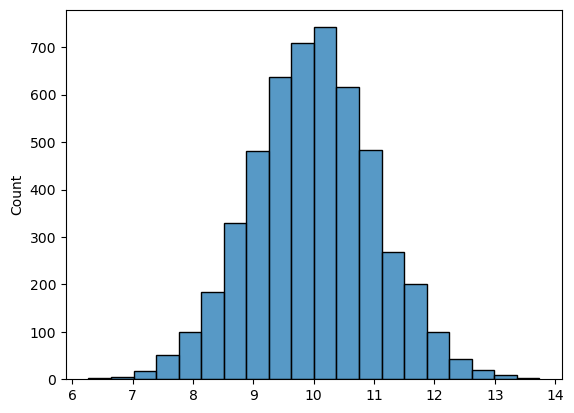

In [28]:
sns.histplot(a, bins = 20)
plt.show()

### .shuffle()

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html

El método **.shuffle()** desordena *in-place* un array NumPy:

In [29]:
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [30]:
generator.shuffle(a)
a

array([1, 2, 5, 4, 0, 3])

Este método permite especificar el eje a lo largo del cual se va a desordenar el array pasado como argumento:

In [31]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [32]:
generator.shuffle(a, axis = 0)
a

array([[ 4,  5,  6,  7],
       [ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

### .permutation()

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html

Este método es semejante al método **.shuffle()** con la diferencia de que no modifica el array *in-place*, sino que devuelve un nuevo array:

In [33]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [34]:
generator.permutation(a, axis = 1)

array([[ 2,  0,  1,  3],
       [ 6,  4,  5,  7],
       [10,  8,  9, 11]])

### .choice()

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html

El método **.choice()** devuelve un array del tamaño indicado conteniendo una muestra del array unidimensional pasado como argumento:

In [35]:
options = ["alfa", "beta", "gamma", "delta", "épsilon"]
generator.choice(options, size = 2)

array(['épsilon', 'gamma'], dtype='<U7')

El parámetro **replace** determina si la selección se hace o no con reemplazo (por defecto este parámetro toma el valor *True*):

In [36]:
options = ["alfa", "beta", "gamma", "delta", "épsilon"]
generator.choice(options, size = 3, replace = False)

array(['épsilon', 'beta', 'gamma'], dtype='<U7')

Si la selección se realiza sin reemplazo, el número de elementos a generar deberá ser menor o igual al número de elementos del array unidimensional del que se extraen los valores. Pero si se realiza con reemplazo, el número de elementos a generar puede ser mayor:

In [37]:
options = ["alfa", "beta", "gamma", "delta", "épsilon"]
generator.choice(options, size = 8, replace = True)

array(['épsilon', 'delta', 'alfa', 'épsilon', 'gamma', 'alfa', 'épsilon',
       'beta'], dtype='<U7')

### Otras distribuciones

Hay otras distribuciones disponibles a partir de las que crear arrays de números aleatorios:
* Beta, https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.beta.html
* Chi-squared, https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.chisquare.html
* Exponencial, https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html
* Poission, https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html

### seed

Para asegurar la reproducibilidad de nuestro código podemos establecer una semilla. Esto se realiza directamente en el momento de crear el generador:

In [38]:
generator = Generator(PCG64(seed = 18))

Probémoslo. Generemos algunos números enteros:

In [39]:
generator.integers(0, 10, size = 6)

array([8, 3, 2, 7, 8, 2], dtype=int64)

Ahora creamos de nuevo el generador:

In [40]:
generator = Generator(PCG64(seed = 18))

Y volvemos a generar los números aleatorios:

In [41]:
generator.integers(0, 10, size = 6)

array([8, 3, 2, 7, 8, 2], dtype=int64)

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>